### Cointegration Pair Trading

Based on this [NEDL video](https://www.youtube.com/watch?v=jvZ0vuC9oJk&t=5s)

In [1]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt

print("Yahoo Finance: ", yf.__version__)

Yahoo Finance:  0.2.55


In [3]:
# Specifying parameters
stocks = ['JPM', 'C']
start = '2019-12-31'
end = '2021-03-08'
fee = 0.001
window = 252
# Threshold value of the t-statistics from unit root regression.
# The more negative the t-statistics, the better.
# Rules of thumbs: should be less than -2.5.
# -3 is very good, -4 is excellent, -5 is wonderful.
t_threshold = -2.5

# Retrieving data
data = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Calculate returns
returns = pd.DataFrame()
for stock in stocks:
    df_t = data[stock][1:].reset_index(drop=True)
    df_tm1 = data[stock][:-1].reset_index(drop=True)
    r = df_t / df_tm1 - 1.0
    returns[stock] = np.append(r, 0)

print(returns)

          JPM         C
0    0.012123  0.016773
1   -0.013196 -0.018836
2   -0.000795 -0.003137
3   -0.017001 -0.008685
4    0.007801  0.007618
..        ...       ...
292 -0.003256 -0.009059
293  0.019332  0.021332
294 -0.015368 -0.008099
295  0.002325  0.006016
296  0.000000  0.000000

[297 rows x 2 columns]


C:\Users\sebgu\AppData\Local\Temp\ipykernel_10024\1569454561.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res1 = spop.minimize(unit_root, data[stock2][t] / data[stock1][t], method='Nelder-Mead')
C:\Users\sebgu\AppData\Local\Temp\ipykernel_10024\1569454561.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)
C:\Users\sebgu\AppData\Local\Temp\ipykernel_10024\1569454561.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

day 2020-12-30 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2020-12-31 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-04 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-05 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-06 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-07 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-08 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-11 00:00:00

no tradign
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.0%

day 2021-01-12 00:00:00

no tradign
gross daily return: 

C:\Users\sebgu\AppData\Local\Temp\ipykernel_10024\1569454561.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signal = np.sign(fair_value - data[stock2][t])


day 2021-01-19 00:00:00

long position on JPM and short position on C
gross daily return: -0.81%
net daily return: -1.01%
cumulative net return so far: 0.62%

day 2021-01-20 00:00:00

long position on JPM and short position on C
gross daily return: 1.34%
net daily return: 1.34%
cumulative net return so far: 1.97%

day 2021-01-21 00:00:00

long position on C and short position on JPM
gross daily return: -0.1%
net daily return: -0.3%
cumulative net return so far: 1.66%

day 2021-01-22 00:00:00

long position on JPM and short position on C
gross daily return: 0.01%
net daily return: -0.19%
cumulative net return so far: 1.46%

day 2021-01-25 00:00:00

long position on C and short position on JPM
gross daily return: 0.99%
net daily return: 0.79%
cumulative net return so far: 2.26%

day 2021-01-26 00:00:00

long position on JPM and short position on C
gross daily return: -0.35%
net daily return: -0.55%
cumulative net return so far: 1.7%

day 2021-01-27 00:00:00

long position on JPM and shor

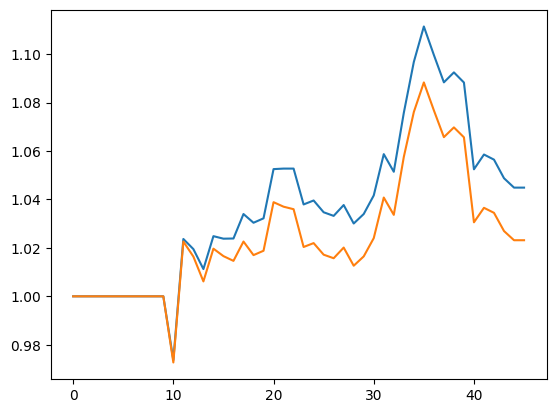

In [8]:
# Initializing arrays
gross_returns = np.array([])
net_returns = np.array([])
t_s = np.array([])
stock1 = stocks[0]
stock2 = stocks[1]
for t in range(window, len(data)):
    # Define the unit root function: stock2 = a + b * stock1
    def unit_root(b):
        a = np.average(data[stock2][t-window:t] - b * data[stock1][t-window:t])
        fair_value = a + b * data[stock1][t-window:t]
        diff = np.array(fair_value - data[stock2][t-window:t])
        diff_diff = diff[1:] - diff[:-1]
        reg = sm.OLS(diff_diff, diff[:-1])
        res = reg.fit()
        return res.params[0] / res.bse[0] # Dicky-Fuller t-stat

    # Optimize for most negative t-stat
    res1 = spop.minimize(unit_root, data[stock2][t] / data[stock1][t], method='Nelder-Mead')
    t_opt = res1.fun
    b_opt = float(res1.x)
    a_opt = np.average(data[stock2][t-window:t] - b_opt * data[stock1][t-window:t])
    fair_value = a_opt + b_opt * data[stock1][t]

    # Simulate trading
    if t == window:
        old_signal = 0

    if t_opt > t_threshold:
        signal = 0
        gross_return = 0
    else:
        signal = np.sign(fair_value - data[stock2][t])
        gross_return = signal * returns[stock2][t] - signal * returns[stock1][t]

    fees = fee * abs(signal - old_signal)
    net_return = gross_return - fees
    gross_returns = np.append(gross_returns, gross_return)
    net_returns = np.append(net_returns, net_return)
    t_s = np.append(t_s, t_opt)

    # Interface: reporting daily positions and realized returns
    print('day ' + str(data.index[t]))
    print('')
    if signal == 0:
        print('no tradign')
    elif signal == 1:
        print('long position on ' + stock2 + ' and short position on ' + stock1)
    else:
        print('long position on ' + stock1 + ' and short position on ' + stock2)

    print('gross daily return: ' + str(round(gross_return * 100, 2)) + '%')
    print('net daily return: ' + str(round(net_return * 100, 2)) + '%')
    print('cumulative net return so far: ' + str(round(np.prod(1 + net_returns) * 100 - 100, 2)) + '%')
    print('')
    old_signal = signal

plt.plot(np.append(1, np.cumprod(1 + gross_returns)))
plt.plot(np.append(1, np.cumprod(1 + net_returns)))